# Lab | Random variable distributions

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/accountmanager/Desktop/Iron Hack/Unit_4/we_fn_use_c_marketing_customer_value_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 1 Get the numerical variables from our dataset.

In [2]:
numericals = df.select_dtypes(include = 'number')
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### 2 Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

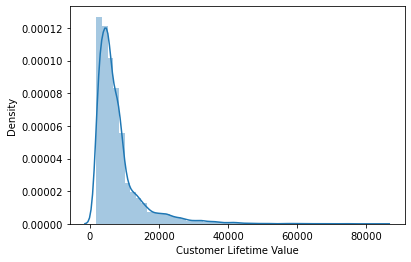

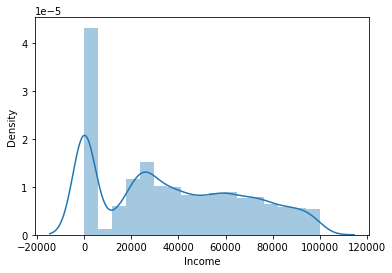

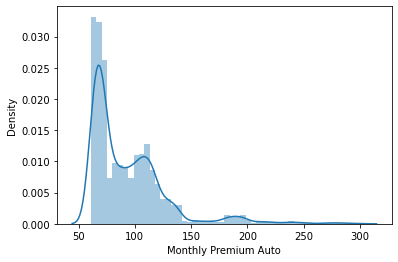

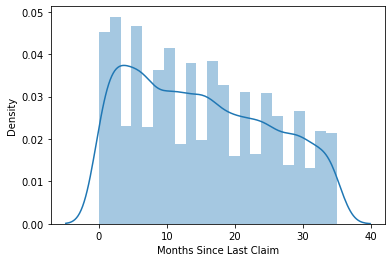

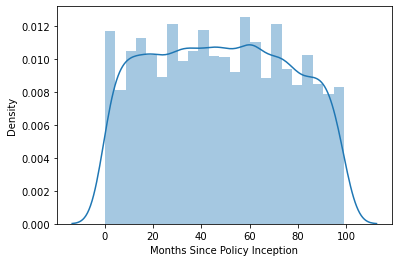

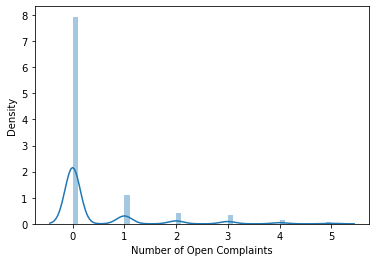

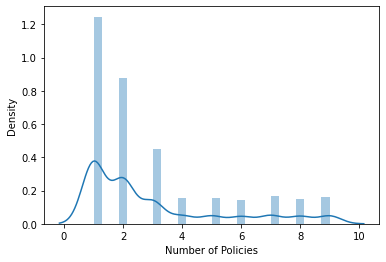

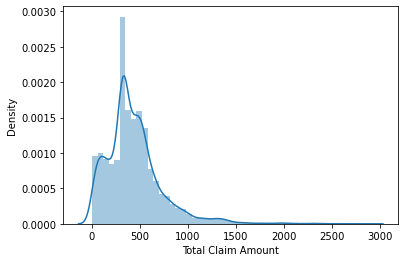

In [3]:
# it looks like normal distrib. most of the time

for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

### 3 Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [9]:
df2 = df.copy()
df2

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2.703839,No,Basic,Bachelor,2/24/11,Employed,F,1247.937066,Suburban,Married,0.685347,10.876059,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize
1,QZ44356,Arizona,2.754926,No,Extended,Bachelor,1/31/11,Unemployed,F,1167.961720,Suburban,Single,0.685871,5.808248,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize
2,AI49188,Nevada,2.780772,No,Premium,Bachelor,2/19/11,Employed,F,1144.063081,Suburban,Married,0.686039,7.347815,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize
3,WW63253,California,2.759125,No,Basic,Bachelor,1/20/11,Unemployed,M,1167.961720,Suburban,Married,0.686018,7.347815,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize
4,HB64268,Washington,2.704995,No,Basic,Bachelor,2/3/11,Employed,M,1072.375744,Rural,Single,0.685461,5.471294,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.801170,No,Basic,Bachelor,2/10/11,Employed,M,1448.531450,Urban,Married,0.685461,7.347815,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,23.588905,Four-Door Car,Medsize
9130,PK87824,California,2.711030,Yes,Extended,College,2/12/11,Employed,F,697.790558,Suburban,Divorced,0.685606,6.134207,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,32.792951,Four-Door Car,Medsize
9131,TD14365,California,2.762062,No,Extended,Bachelor,2/6/11,Unemployed,M,1167.961720,Suburban,Single,0.685725,4.379465,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,47.263726,Four-Door Car,Medsize
9132,UP19263,California,2.758397,No,Extended,College,2/3/11,Employed,M,704.383672,Suburban,Married,0.685898,11.319628,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,44.225147,Four-Door Car,Large


In [6]:
def boxcox_transform(df2):
    numeric_cols = df2.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df2[column] = np.where(df2[column]<=0, np.NAN, df2[column]) 
        df2[column] = df2[column].fillna(df2[column].mean())
        transformed_data, ci = stats.boxcox(df2[column])
        df2[column] = transformed_data
        _ci[column] = [ci] 
    return df2, _ci

df2, _ci = boxcox_transform(df2)

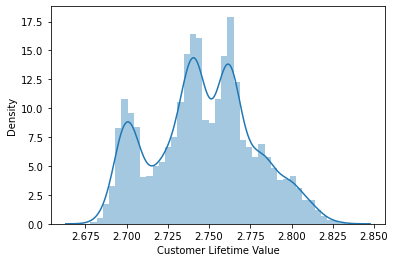

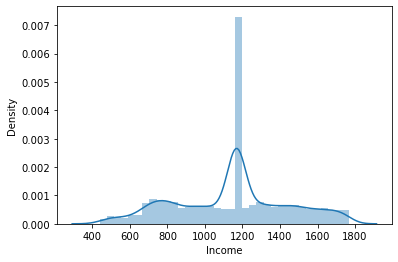

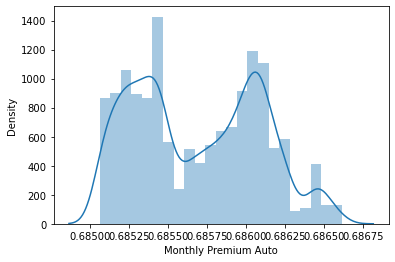

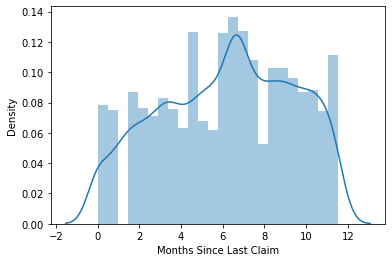

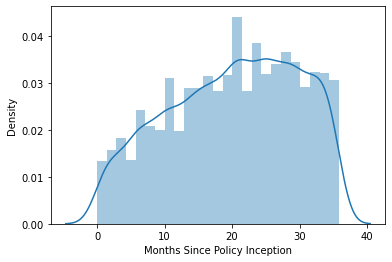

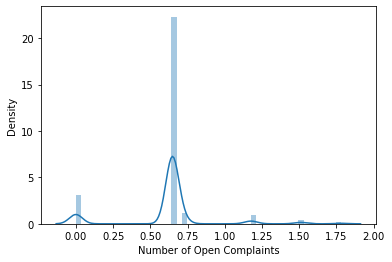

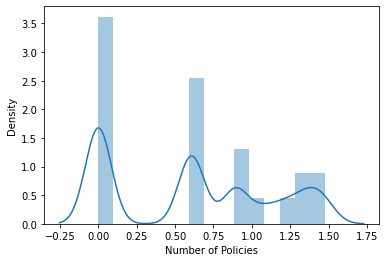

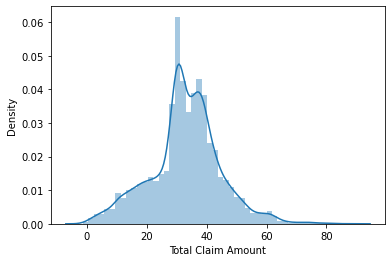

In [7]:
# still look like normal distribution except for some features like the first one in this case, it show in a better way the data

for column in df2.select_dtypes(np.number).columns:
    sns.distplot(df2[column])
    plt.show()

In [10]:
df3 = df.copy()
df3

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2.703839,No,Basic,Bachelor,2/24/11,Employed,F,1247.937066,Suburban,Married,0.685347,10.876059,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize
1,QZ44356,Arizona,2.754926,No,Extended,Bachelor,1/31/11,Unemployed,F,1167.961720,Suburban,Single,0.685871,5.808248,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize
2,AI49188,Nevada,2.780772,No,Premium,Bachelor,2/19/11,Employed,F,1144.063081,Suburban,Married,0.686039,7.347815,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize
3,WW63253,California,2.759125,No,Basic,Bachelor,1/20/11,Unemployed,M,1167.961720,Suburban,Married,0.686018,7.347815,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize
4,HB64268,Washington,2.704995,No,Basic,Bachelor,2/3/11,Employed,M,1072.375744,Rural,Single,0.685461,5.471294,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.801170,No,Basic,Bachelor,2/10/11,Employed,M,1448.531450,Urban,Married,0.685461,7.347815,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,23.588905,Four-Door Car,Medsize
9130,PK87824,California,2.711030,Yes,Extended,College,2/12/11,Employed,F,697.790558,Suburban,Divorced,0.685606,6.134207,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,32.792951,Four-Door Car,Medsize
9131,TD14365,California,2.762062,No,Extended,Bachelor,2/6/11,Unemployed,M,1167.961720,Suburban,Single,0.685725,4.379465,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,47.263726,Four-Door Car,Medsize
9132,UP19263,California,2.758397,No,Extended,College,2/3/11,Employed,M,704.383672,Suburban,Married,0.685898,11.319628,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,44.225147,Four-Door Car,Large


In [19]:
df3 = np.log(df3 + 1) 

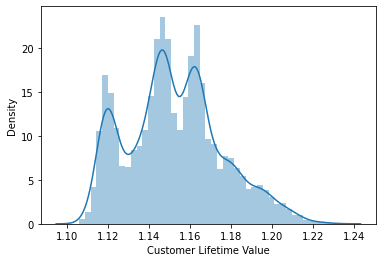

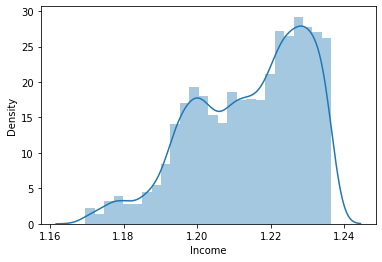

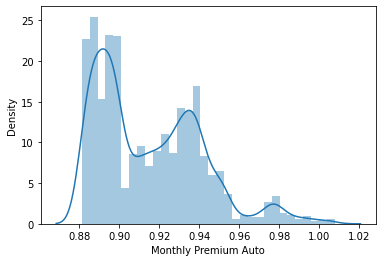

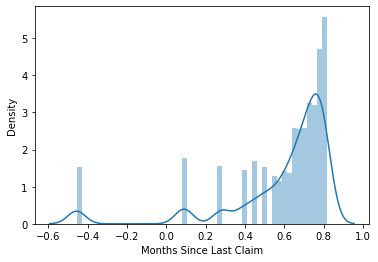

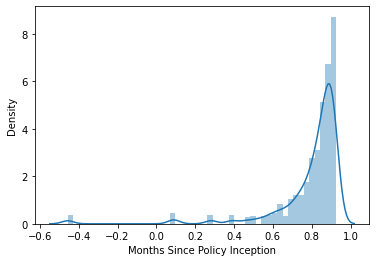

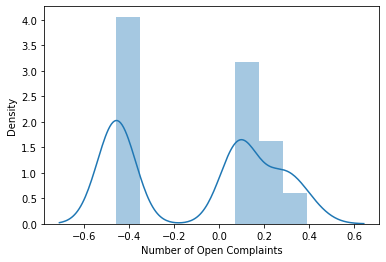

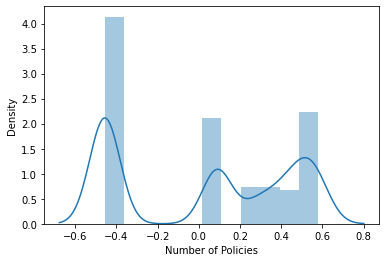

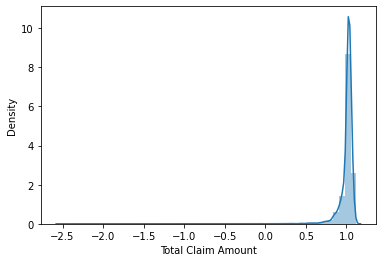

In [20]:
# this one seems more like exponential

for column in df3.select_dtypes(np.number).columns:
    sns.distplot(df3[column])
    plt.show()